# Analysis of Hallprobe data for TB Dipoles

## Nominal Energy: ~0.150 GeV (Current: 253.622 A)

In [1]:
import lnls.hallprobe as hp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [4]:
energy = 0.150
x0 = 4.6467
s_step = 0.1
currlabel = '0253p622A'

spec_dip = 15.0    # [Deg]
spec_dip_error = 0.15  # [%]
# spec_quad = 0.1  # [T]
spec_quad_error = 2.4  # [%]
# spec_sext = 0.0  # [T/m]
spec_sext_error = 9.0  # [%]

data = {
    'TBD-01': '2018-08-01_DTL-001_Model03_Hall_Imc=253.622A',
    'TBD-02': '2018-07-31_DTL-002_Model03_Hall_Imc=253.622A',
    'TBD-03': '2018-08-01_DTL-003_Model03_Hall_Imc=253.622A',
}

danalysis = [hp.FMapAnalysisProductionTB(k, currlabel, v, energy, x0, s_step) for k,v in data.items()]
for d in danalysis:
    d.files_read_results()

In [10]:
danalysis[2].results_angle

-15.0135

# Deflection Angle

<IPython.core.display.Javascript object>


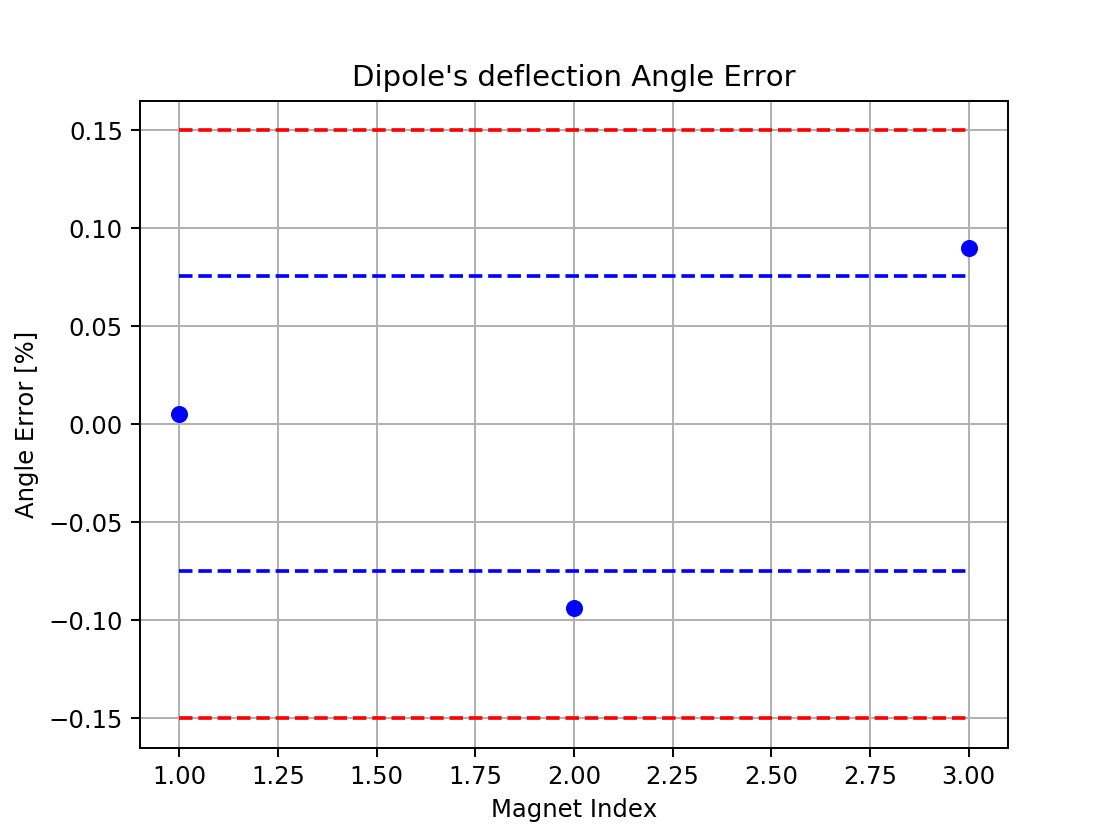

In [11]:
spec_d, spec_d_error = spec_dip, spec_dip_error
d = np.array([-d.results_angle for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d_avg - spec_d)/spec_d
d_error = 100*(d - spec_d)/spec_d
d_error_avg = np.mean(d_error)
d_error_std = np.std(d_error)
n = len(d_error)

plt.figure()
plt.plot([1,2,3], d_error, 'ob')
# Data RMS
plt.plot([1, n], [d_error_avg + d_error_std, ]*2, '--b')
plt.plot([1, n], [d_error_avg - d_error_std, ]*2, '--b')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Angle Error [%]')
plt.title("Dipole's deflection Angle Error")
plt.legend()
plt.show()

In [20]:
v = [15.0011,14.9860,15.0135]; 100*np.std(v)/np.mean(v)

0.074964671626926438

# Integrated Quadrupole

quadrupole of magnet TBD-01: +0.0691 T
quadrupole of magnet TBD-02: +0.0700 T
quadrupole of magnet TBD-03: +0.0682 T


<IPython.core.display.Javascript object>


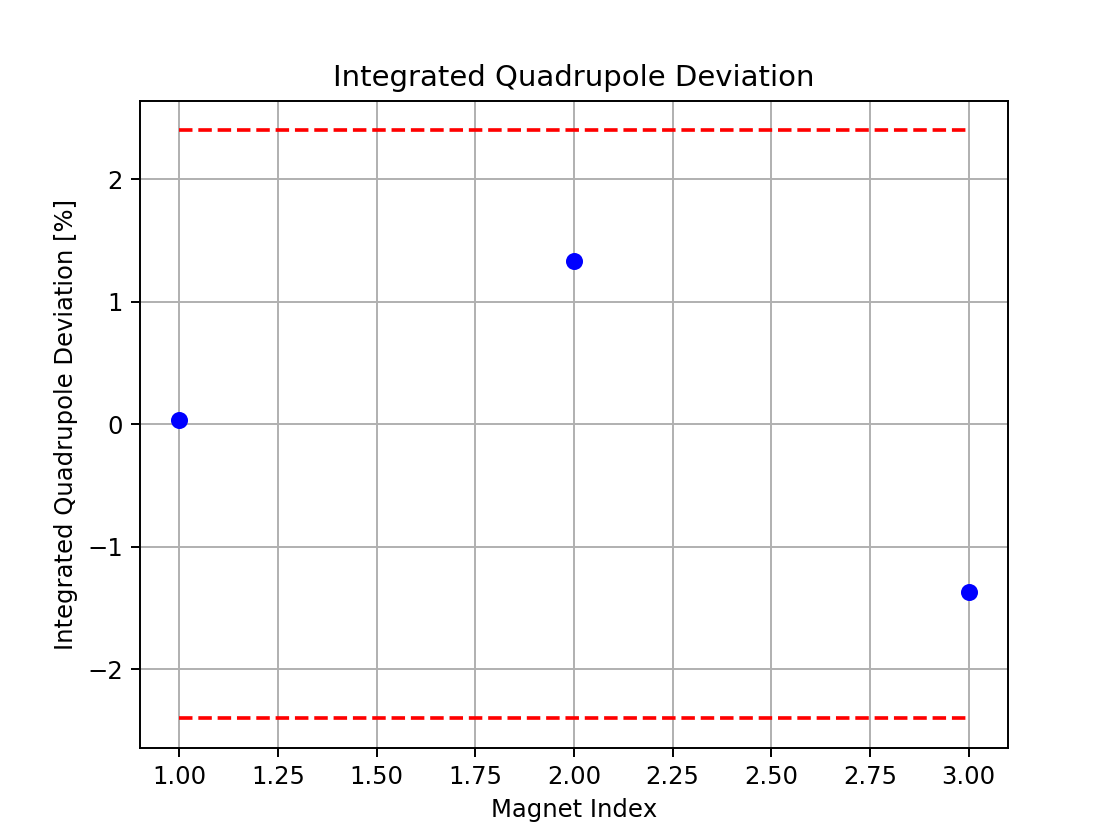

In [12]:
spec_d_error = spec_quad_error
d = np.array([d.multipoles_normal[1] for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d - d_avg)/d_avg
n = len(d_error)

for i in range(len(d)):
    print('quadrupole of magnet {}: {:+.4f} T'.format(danalysis[i].magnet, d[i]))
    
plt.figure()
plt.plot([1,2,3], d_avg_error, 'ob')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Integrated Quadrupole Deviation [%]')
plt.title("Integrated Quadrupole Deviation")
plt.legend()
plt.show()

In [18]:
v = [0.0691, 0.07, 0.0682]; 100*np.std(v)/np.mean(v)

1.0634543022213567

# Integrated Sextupole

sextupole of magnet TBD-01: +1.6919 T/m
sextupole of magnet TBD-02: +1.7432 T/m
sextupole of magnet TBD-03: +1.7399 T/m


<IPython.core.display.Javascript object>


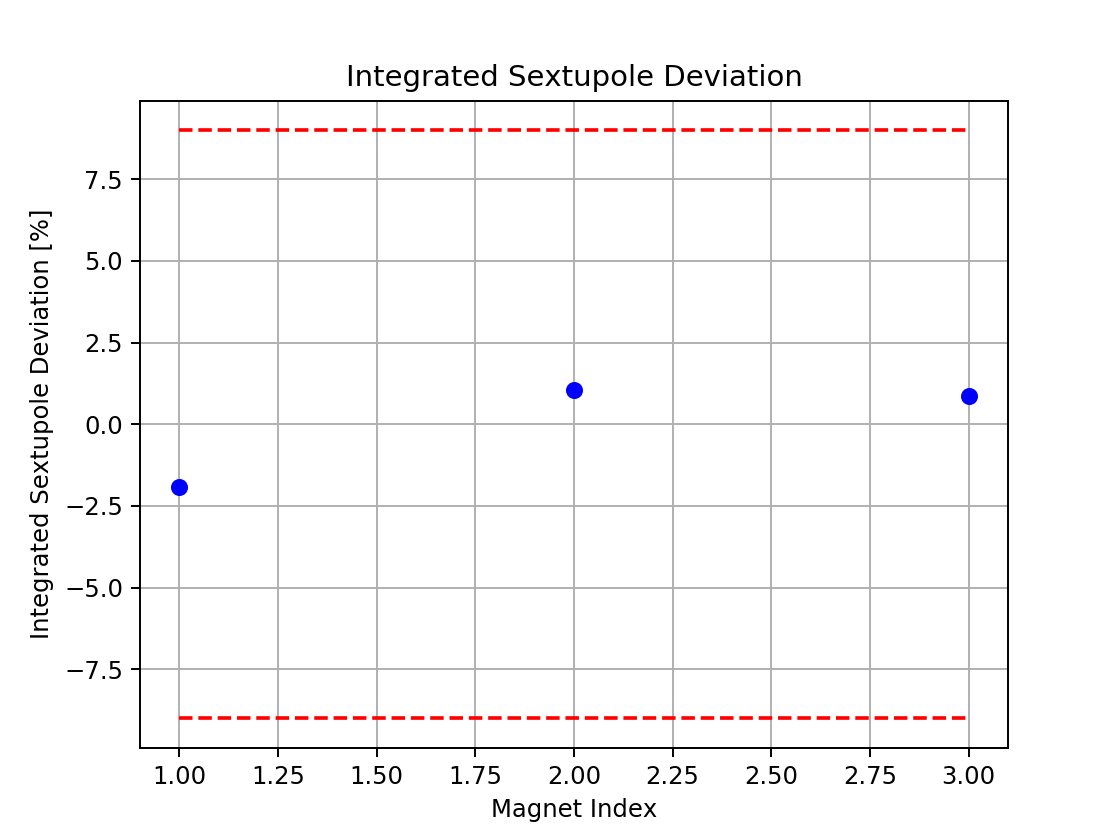

In [13]:
spec_d_error = spec_sext_error
d = np.array([d.multipoles_normal[2] for d in danalysis])
d_avg = np.mean(d)
d_avg_error = 100*(d - d_avg)/d_avg
n = len(d_error)

for i in range(len(d)):
    print('sextupole of magnet {}: {:+.4f} T/m'.format(danalysis[i].magnet, d[i]))

plt.figure()
plt.plot([1,2,3], d_avg_error, 'ob')
# Spec RMS
plt.plot([1, n], [-spec_d_error, ]*2, '--r')
plt.plot([1, n], [+spec_d_error, ]*2, '--r')

plt.grid()
plt.xlabel('Magnet Index')
plt.ylabel('Integrated Sextupole Deviation [%]')
plt.title("Integrated Sextupole Deviation")
plt.legend()
plt.show()

In [19]:
v = [1.6919, 1.7432, 1.7399]; 100*np.std(v)/np.mean(v)

1.3590710592486994

# Multipoles

<IPython.core.display.Javascript object>


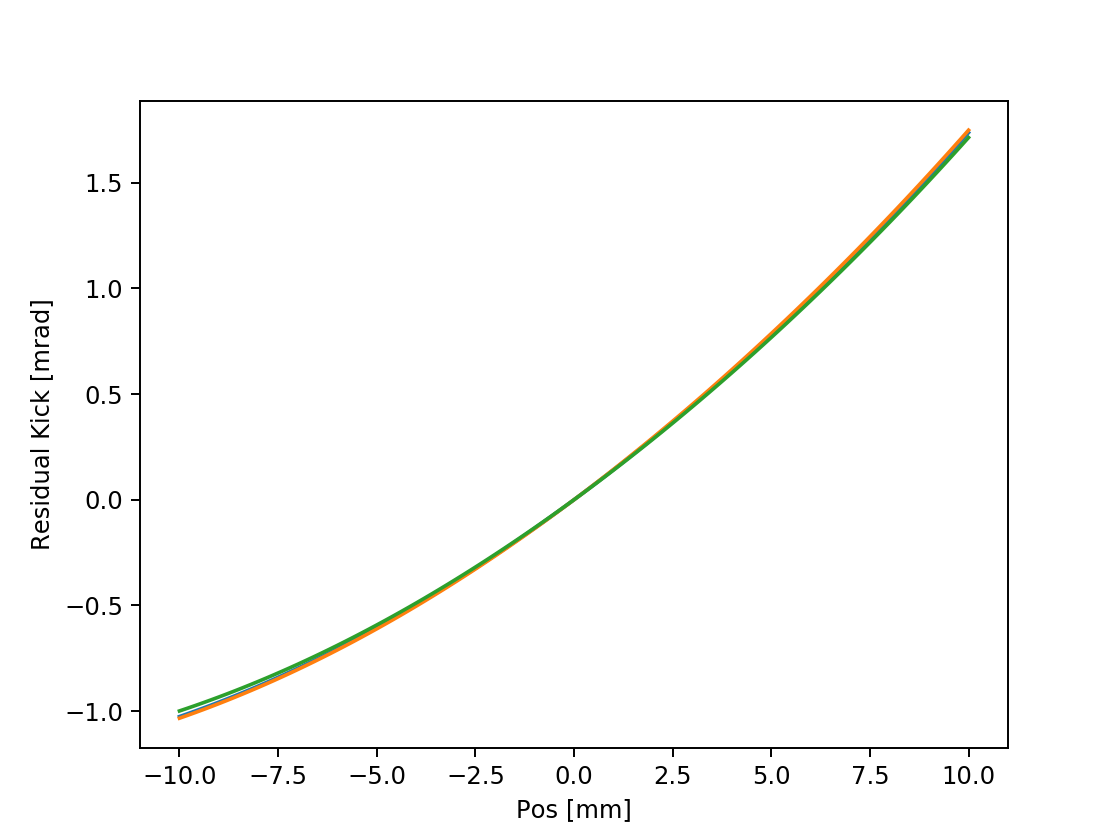

Harm    TBD-01      TBD-02      TBD-03    
n=00  +1.0000e+00 +1.0000e+00 +1.0000e+00 
n=01  -9.2005e-03 -9.3291e-03 -9.0636e-03 
n=02  -3.9395e-03 -4.0630e-03 -4.0481e-03 
n=03  -1.3467e-06 +2.9981e-04 +2.5127e-04 
n=04  -8.6199e-04 -3.5497e-04 -3.6931e-04 
n=05  +7.6611e-05 -3.1892e-04 -3.5023e-04 
n=06  +7.5698e-04 +1.2135e-04 +1.2391e-04 


In [14]:
# plot
plt.figure()
for d in danalysis:
    y, x = d.calc_multipoles_kick(10/1000)
    plt.plot(x*1000, y*1e3)
plt.xlabel('Pos [mm]')
plt.ylabel('Residual Kick [mrad]')   
plt.show()

# print
k = tuple(danalysis[0].multipoles_normal_relative.keys())
print('{:5s} '.format('Harm'), end='')
for d in danalysis:
    print('{:^11s} '.format(d.magnet), end='')
print()
for i in range(len(k)):
    print('n={:02d}  '.format(k[i]), end='')
    for d in danalysis:
        print('{:+11.4e} '.format(d.multipoles_normal_relative[k[i]]), end='')
    print()